# Predicting Parkinson's disease using Machine Learning

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
df=pd.read_csv('parkinsons.csv')

In [3]:
df.shape

(195, 24)

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
df.rename(columns ={'MDVP:Fo(Hz)':'Average vocal fundamental frequency',
                    'MDVP:Fhi(Hz)':'Maximum vocal fundamental frequency',
                    'MDVP:Flo(Hz)':' Minimum vocal fundamental frequency',
                    'MDVP:Jitter(%)':'Jitter(%)','MDVP:Jitter(Abs)':'Jitter(Abs)',
                    'fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate',
                    'exang':'Exercise_induced_angina','oldpeak':'ST_depression',
                    'slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [7]:
# View of the Renamed Dataframe
df.head()

,name,Average vocal fundamental frequency,Maximum vocal fundamental frequency,Minimum vocal fundamental frequency,Jitter(%),Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
list (df.columns.values)


['name',
 'Average vocal fundamental frequency',
 'Maximum vocal fundamental frequency',
 ' Minimum vocal fundamental frequency',
 'Jitter(%)',
 'Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name                                  195 non-null    object 
 1   Average vocal fundamental frequency   195 non-null    float64
 2   Maximum vocal fundamental frequency   195 non-null    float64
 3    Minimum vocal fundamental frequency  195 non-null    float64
 4   Jitter(%)                             195 non-null    float64
 5   Jitter(Abs)                           195 non-null    float64
 6   MDVP:RAP                              195 non-null    float64
 7   MDVP:PPQ                              195 non-null    float64
 8   Jitter:DDP                            195 non-null    float64
 9   MDVP:Shimmer                          195 non-null    float64
 10  MDVP:Shimmer(dB)                      195 non-null    float64
 11  Shimmer:APQ3       

In [10]:
df.describe()

,Average vocal fundamental frequency,Maximum vocal fundamental frequency,Minimum vocal fundamental frequency,Jitter(%),Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
df['status'].value_counts()

,count
status,
1,147
0,48


In [12]:
df.groupby('status').mean(numeric_only=True)

,Average vocal fundamental frequency,Maximum vocal fundamental frequency,Minimum vocal fundamental frequency,Jitter(%),Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [13]:
df.isna().sum()

,0
name,0
Average vocal fundamental frequency,0
Maximum vocal fundamental frequency,0
Minimum vocal fundamental frequency,0
Jitter(%),0
Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


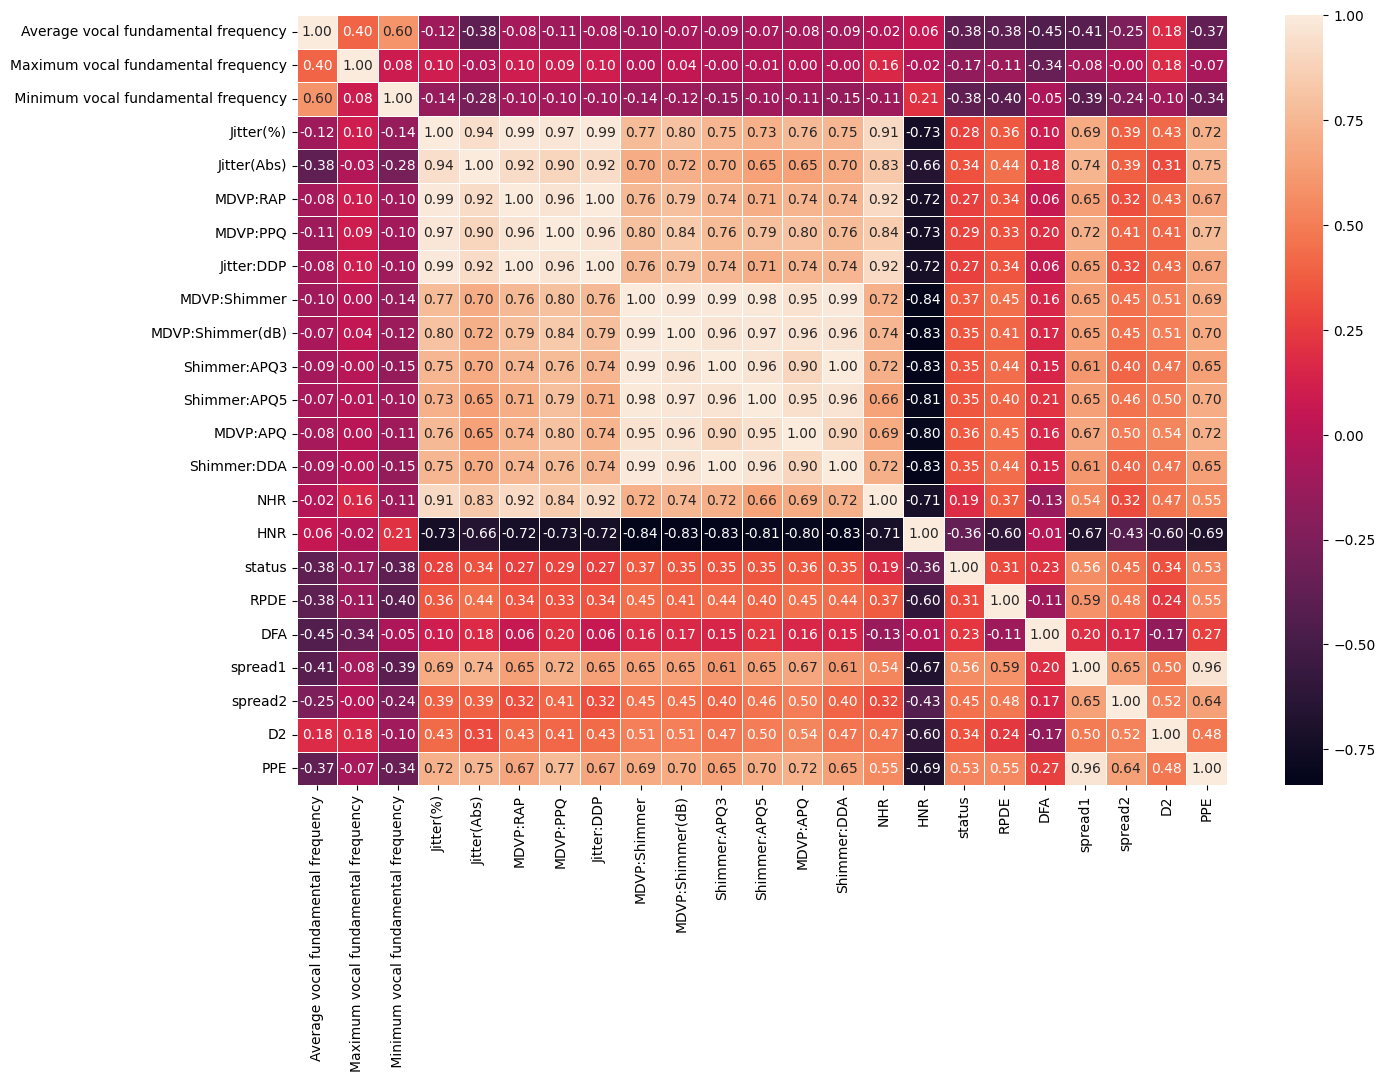

In [14]:
# Let's make our correlation matrix visual
corr_matrix = df.drop(columns=['name']).corr() # Drop the 'name' column before calculating correlation
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [15]:
X=df.drop(['name','status'],axis=1)
Y=df['status']


In [16]:
print(X)

     Average vocal fundamental frequency  Maximum vocal fundamental frequency  \
0                                119.992                              157.302   
1                                122.400                              148.650   
2                                116.682                              131.111   
3                                116.676                              137.871   
4                                116.014                              141.781   
..                                   ...                                  ...   
190                              174.188                              230.978   
191                              209.516                              253.017   
192                              174.688                              240.005   
193                              198.764                              396.961   
194                              214.289                              260.277   

      Minimum vocal fundame

In [17]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


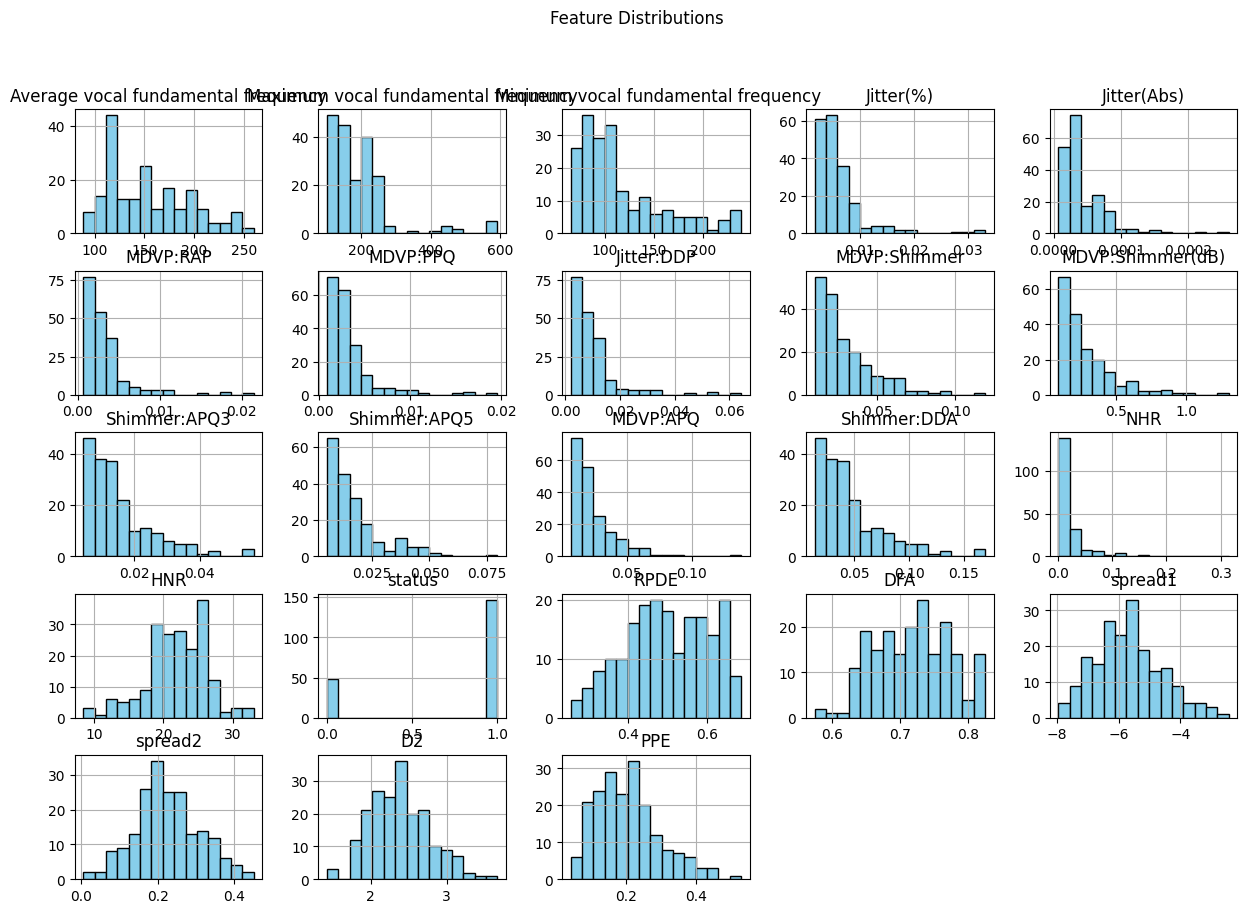

In [18]:
# Histograms for feature distributions
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


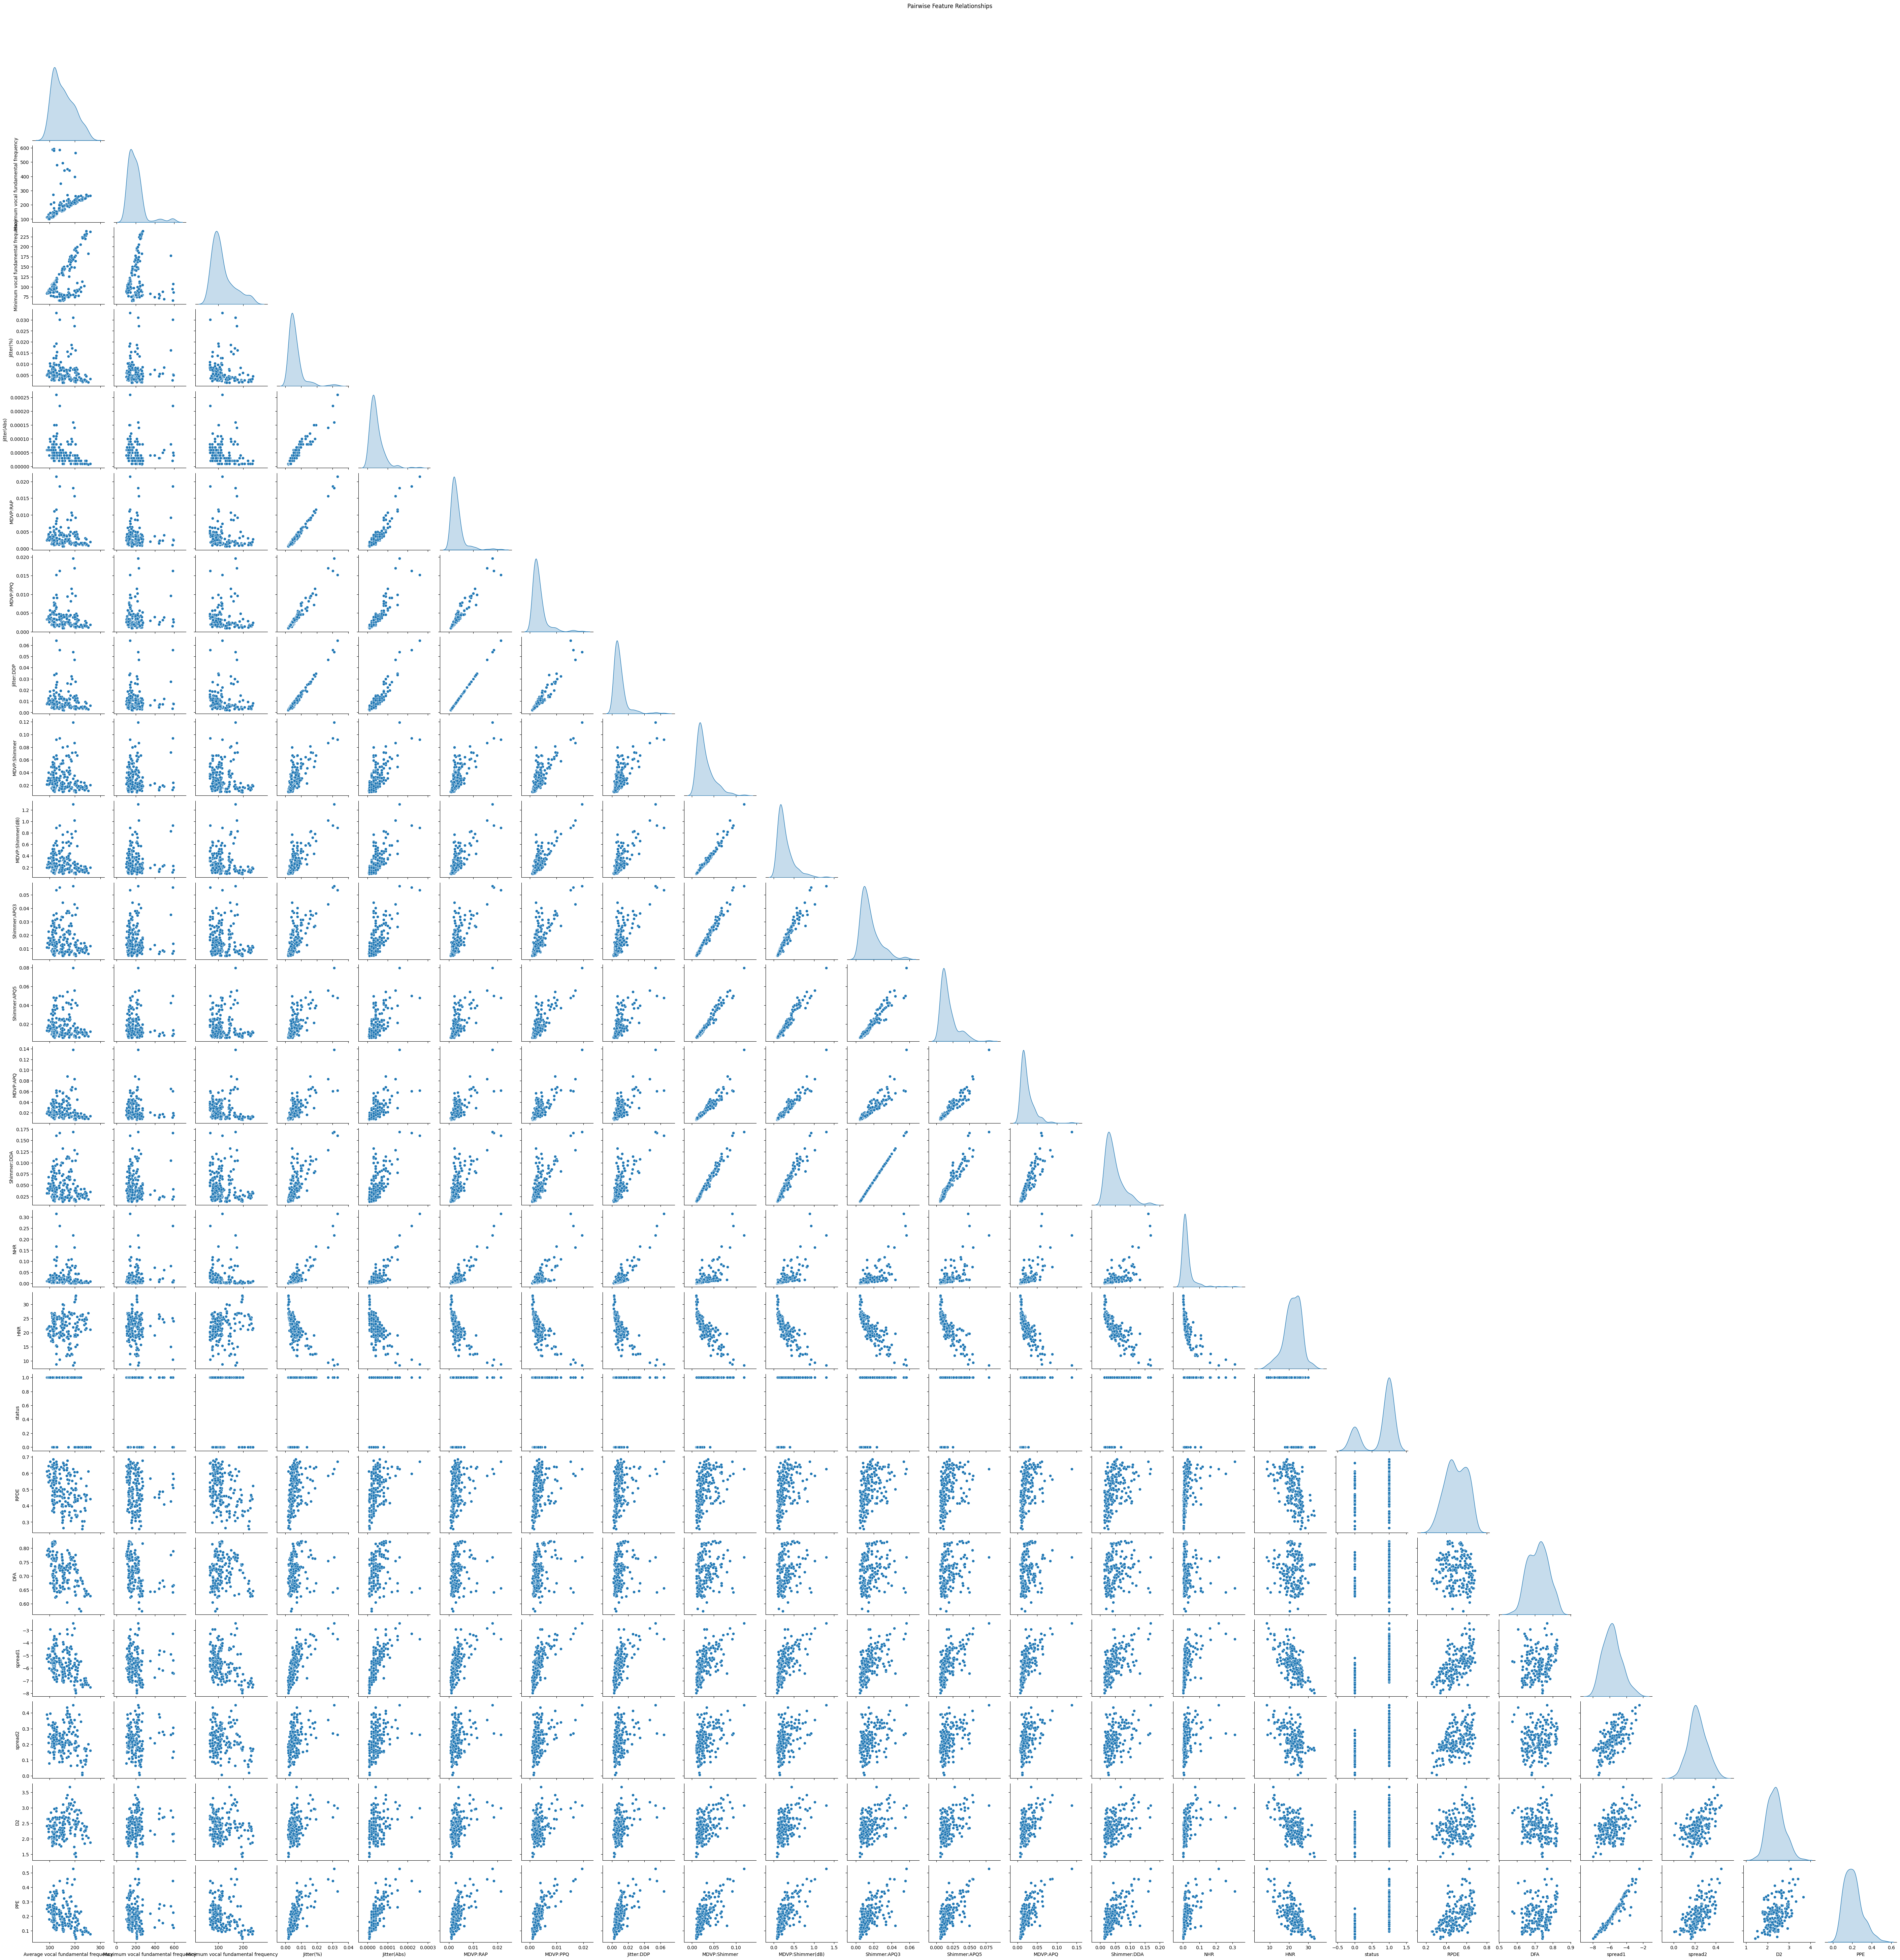

In [19]:
# Pair plot to visualize relationships
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


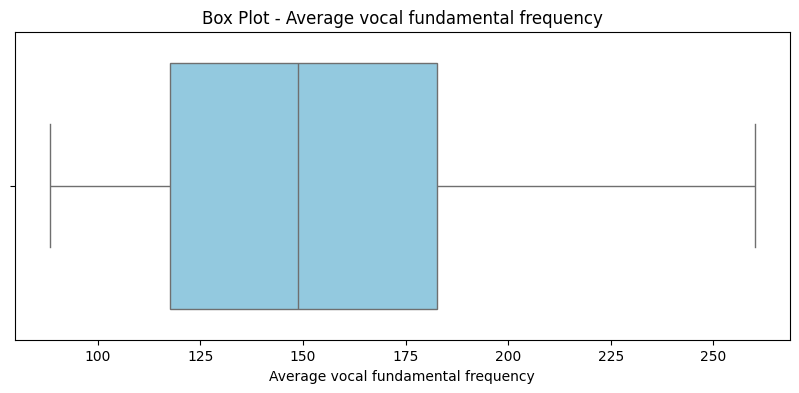

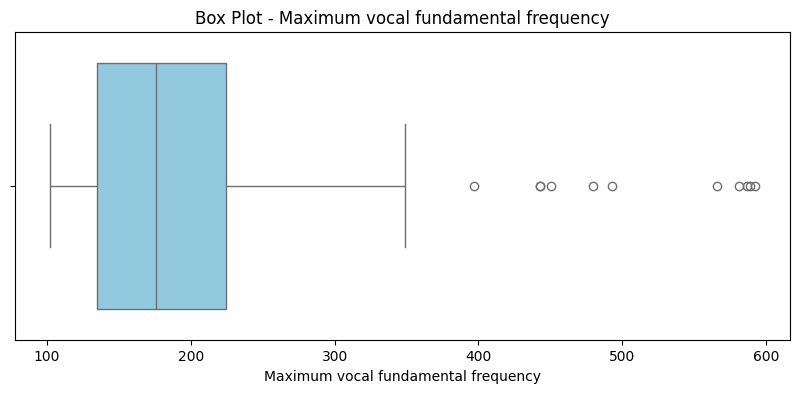

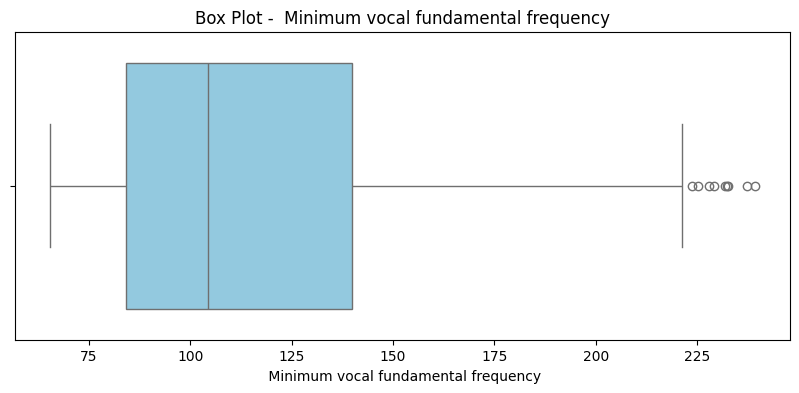

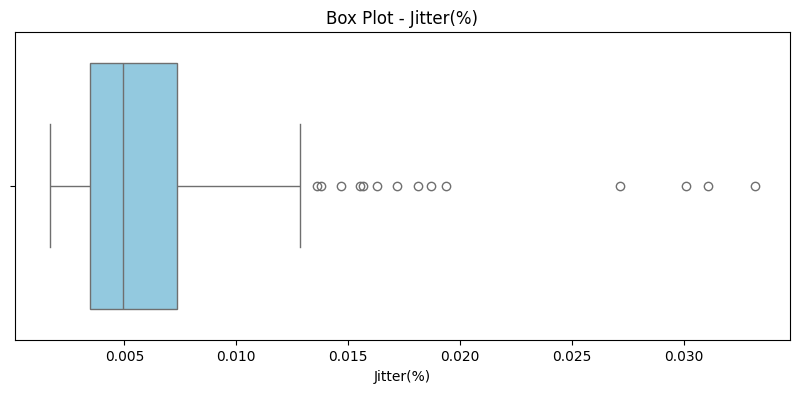

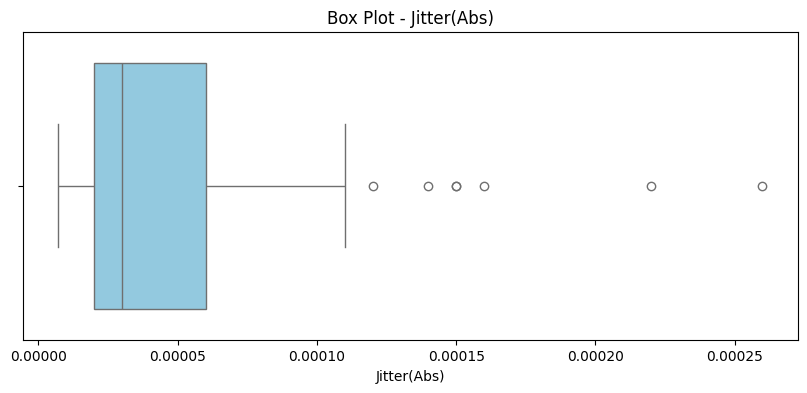

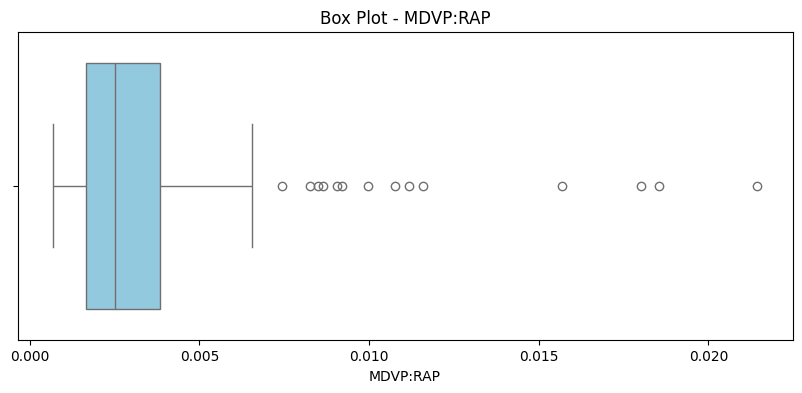

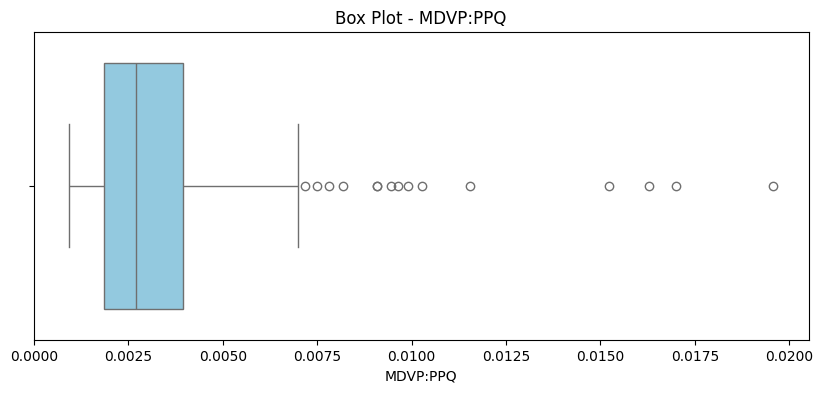

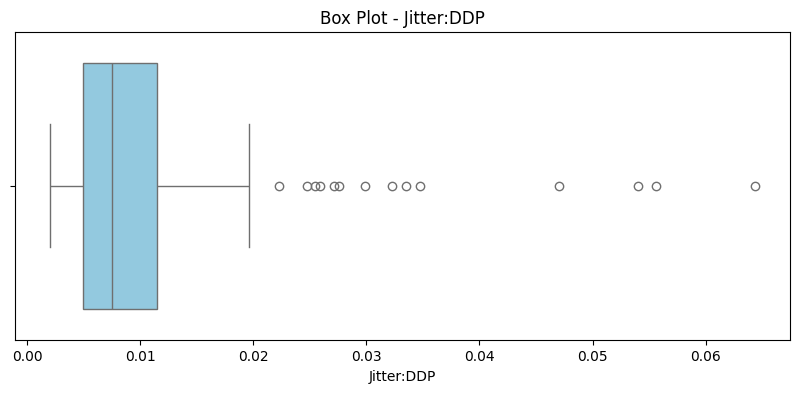

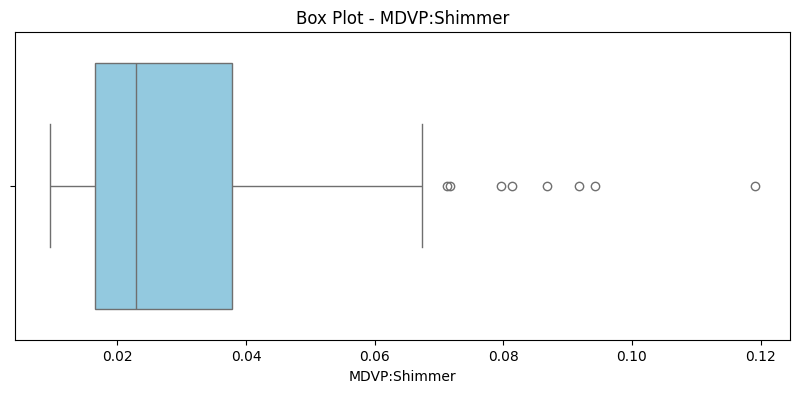

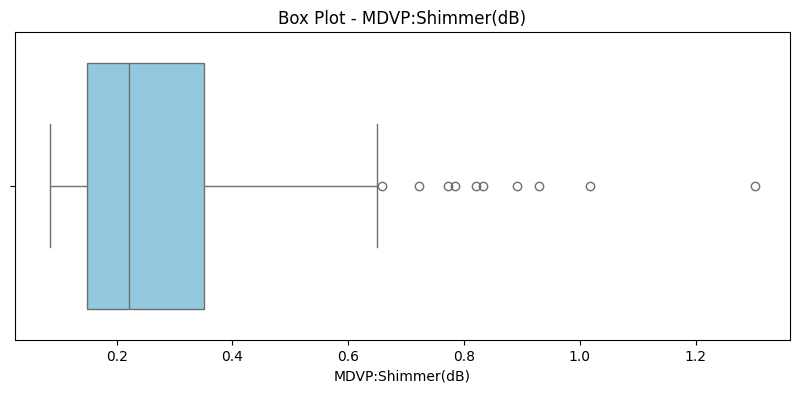

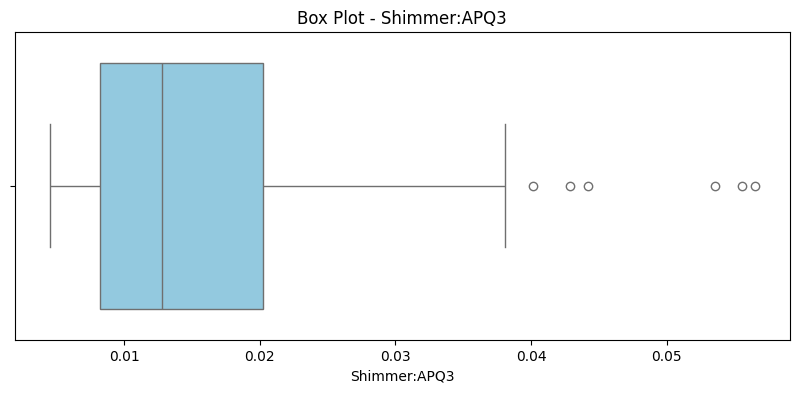

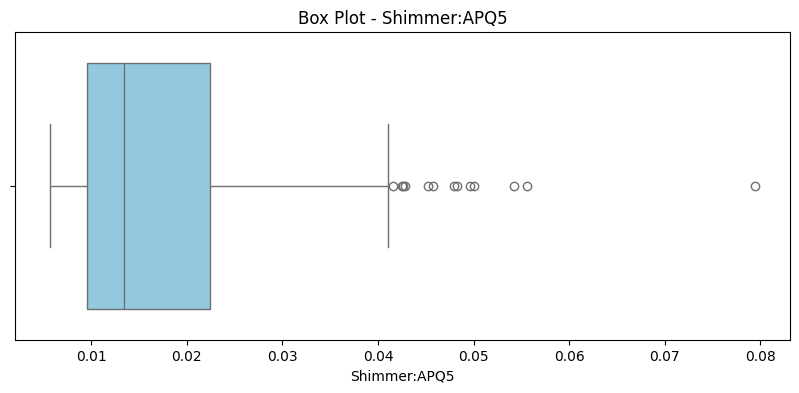

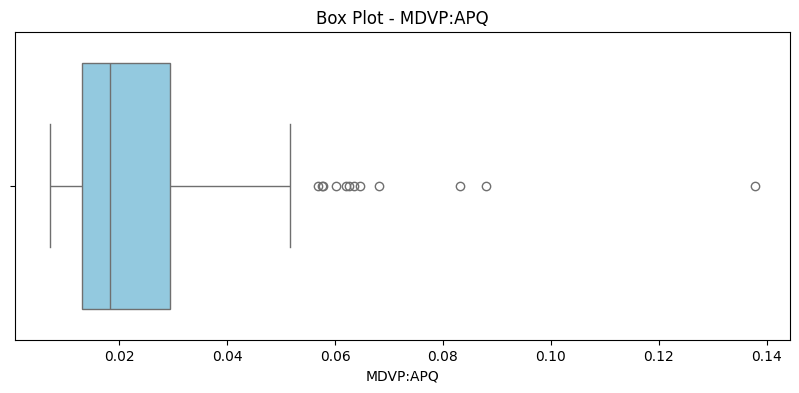

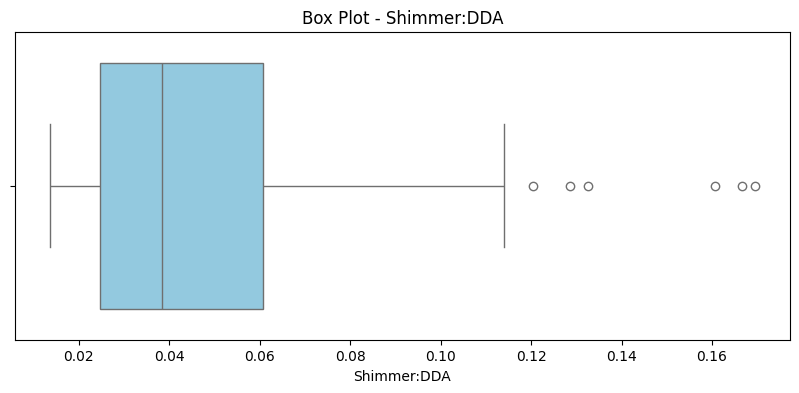

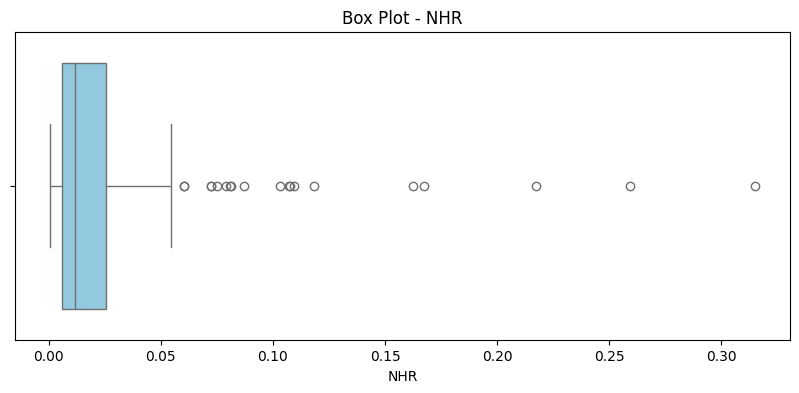

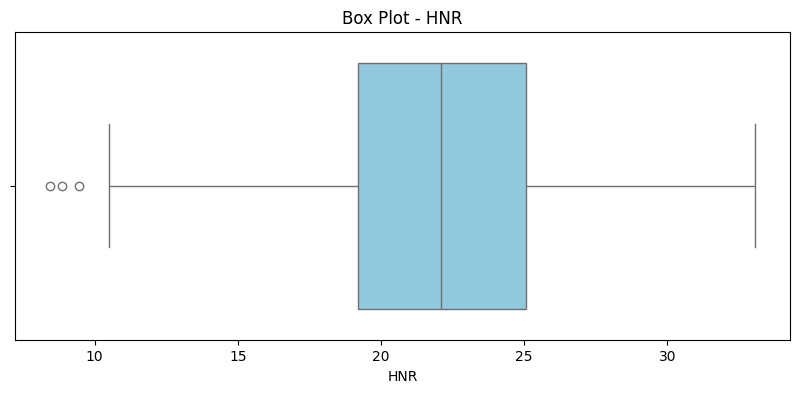

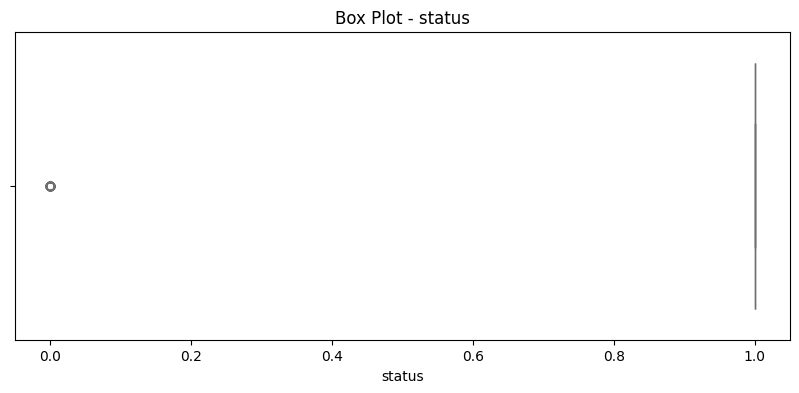

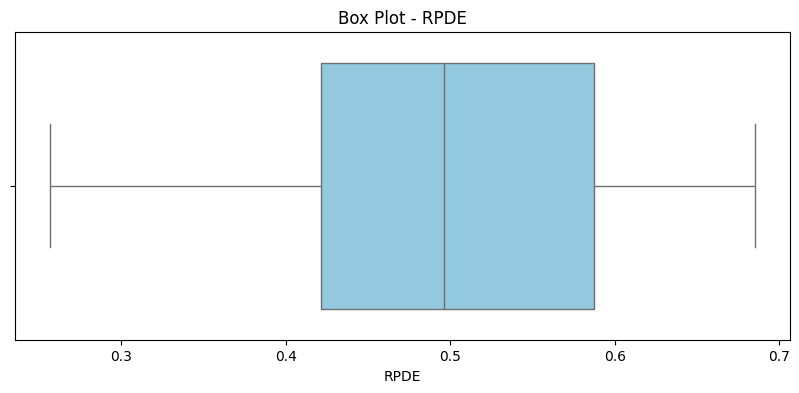

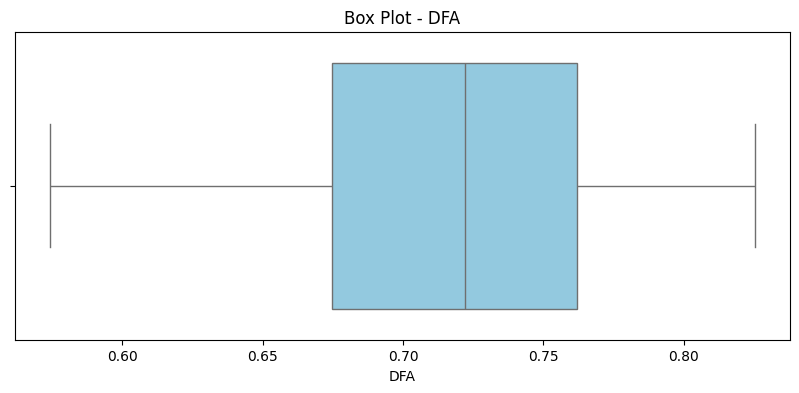

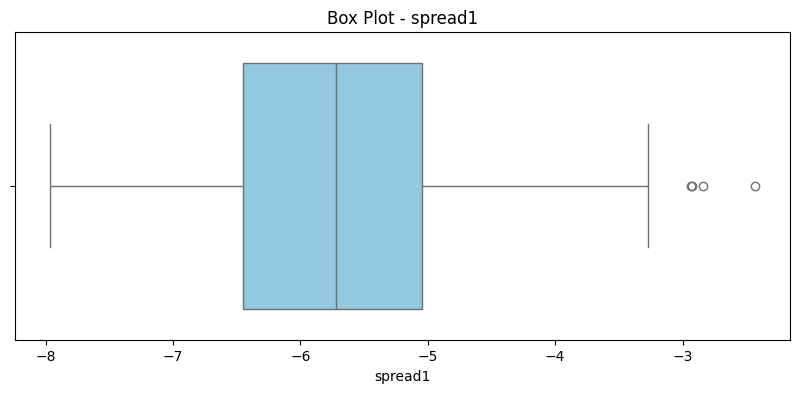

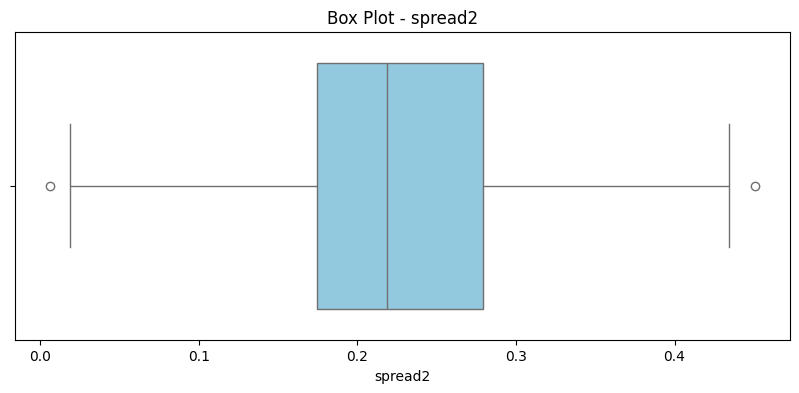

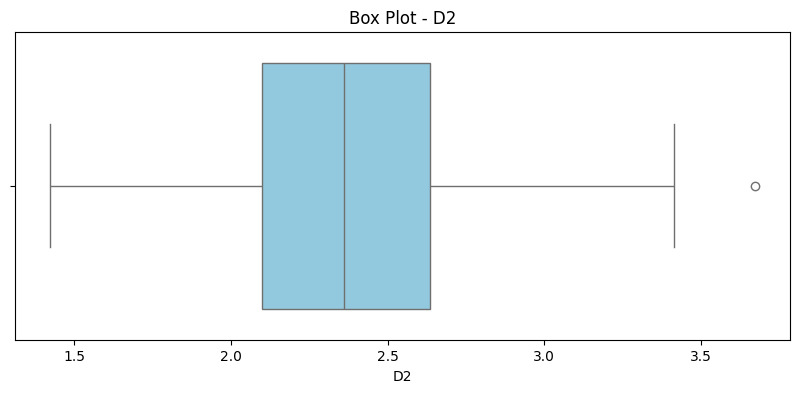

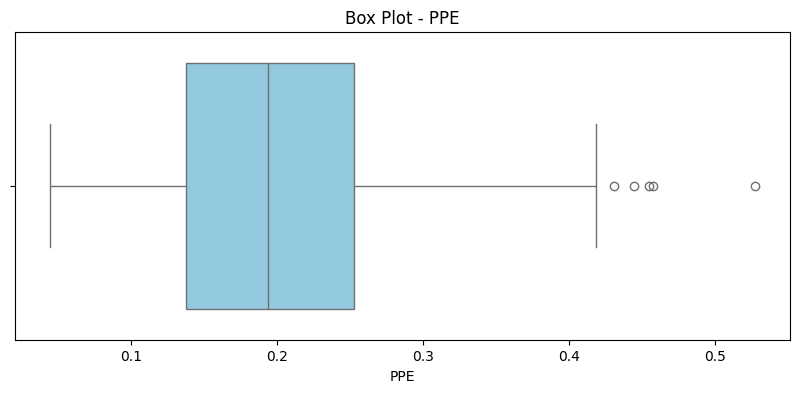

In [20]:
# Box plots for numerical columns
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Box Plot - {column}")
    plt.show()


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [23]:
model = SVC(kernel='linear')

In [24]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [26]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [27]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [28]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and test sets
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, Y_train)

# Predicting on test data
Y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 82.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39


Confusion Matrix:
[[ 5  3]
 [ 4 27]]


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, Y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_dt))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_dt))


Decision Tree Accuracy: 76.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.96      0.74      0.84        31

    accuracy                           0.77        39
   macro avg       0.71      0.81      0.72        39
weighted avg       0.86      0.77      0.79        39


Confusion Matrix:
[[ 7  1]
 [ 8 23]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, Y_train)

# Best estimator and evaluation
best_rf = grid_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(Y_test, rf_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Support Vector Machine
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm.fit(X_train, Y_train)
svm_predictions = svm.predict(X_test)

# Evaluate SVM
print("SVM Classification Report:\n", classification_report(Y_test, svm_predictions))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.92      0.62      0.66        39
weighted avg       0.87      0.85      0.81        39



In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Classification Report:\n", classification_report(Y_test, xgb_predictions))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.87      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39



In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Multi-Layer Perceptron (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, Y_train)
mlp_predictions = mlp.predict(X_test)

# Evaluate MLP
print("MLP Classification Report:\n", classification_report(Y_test, mlp_predictions))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.96      0.81      0.88        31

    accuracy                           0.82        39
   macro avg       0.75      0.84      0.77        39
weighted avg       0.87      0.82      0.83        39



In [35]:
from sklearn.metrics import roc_auc_score

# Compare models using ROC-AUC
models = {'Random Forest': best_rf, 'SVM': svm, 'XGBoost': xgb_model, 'MLP': mlp}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities
    auc = roc_auc_score(Y_test, y_prob)
    print(f"{name} ROC-AUC Score: {auc}")


Random Forest ROC-AUC Score: 0.8951612903225807
SVM ROC-AUC Score: 0.7298387096774194
XGBoost ROC-AUC Score: 0.939516129032258
MLP ROC-AUC Score: 0.8870967741935484


In [36]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


In [37]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [38]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))
for column in X.columns:
  print(column)

Average vocal fundamental frequency
Maximum vocal fundamental frequency
 Minimum vocal fundamental frequency
Jitter(%)
Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
